c:\users\s1250039\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:248: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


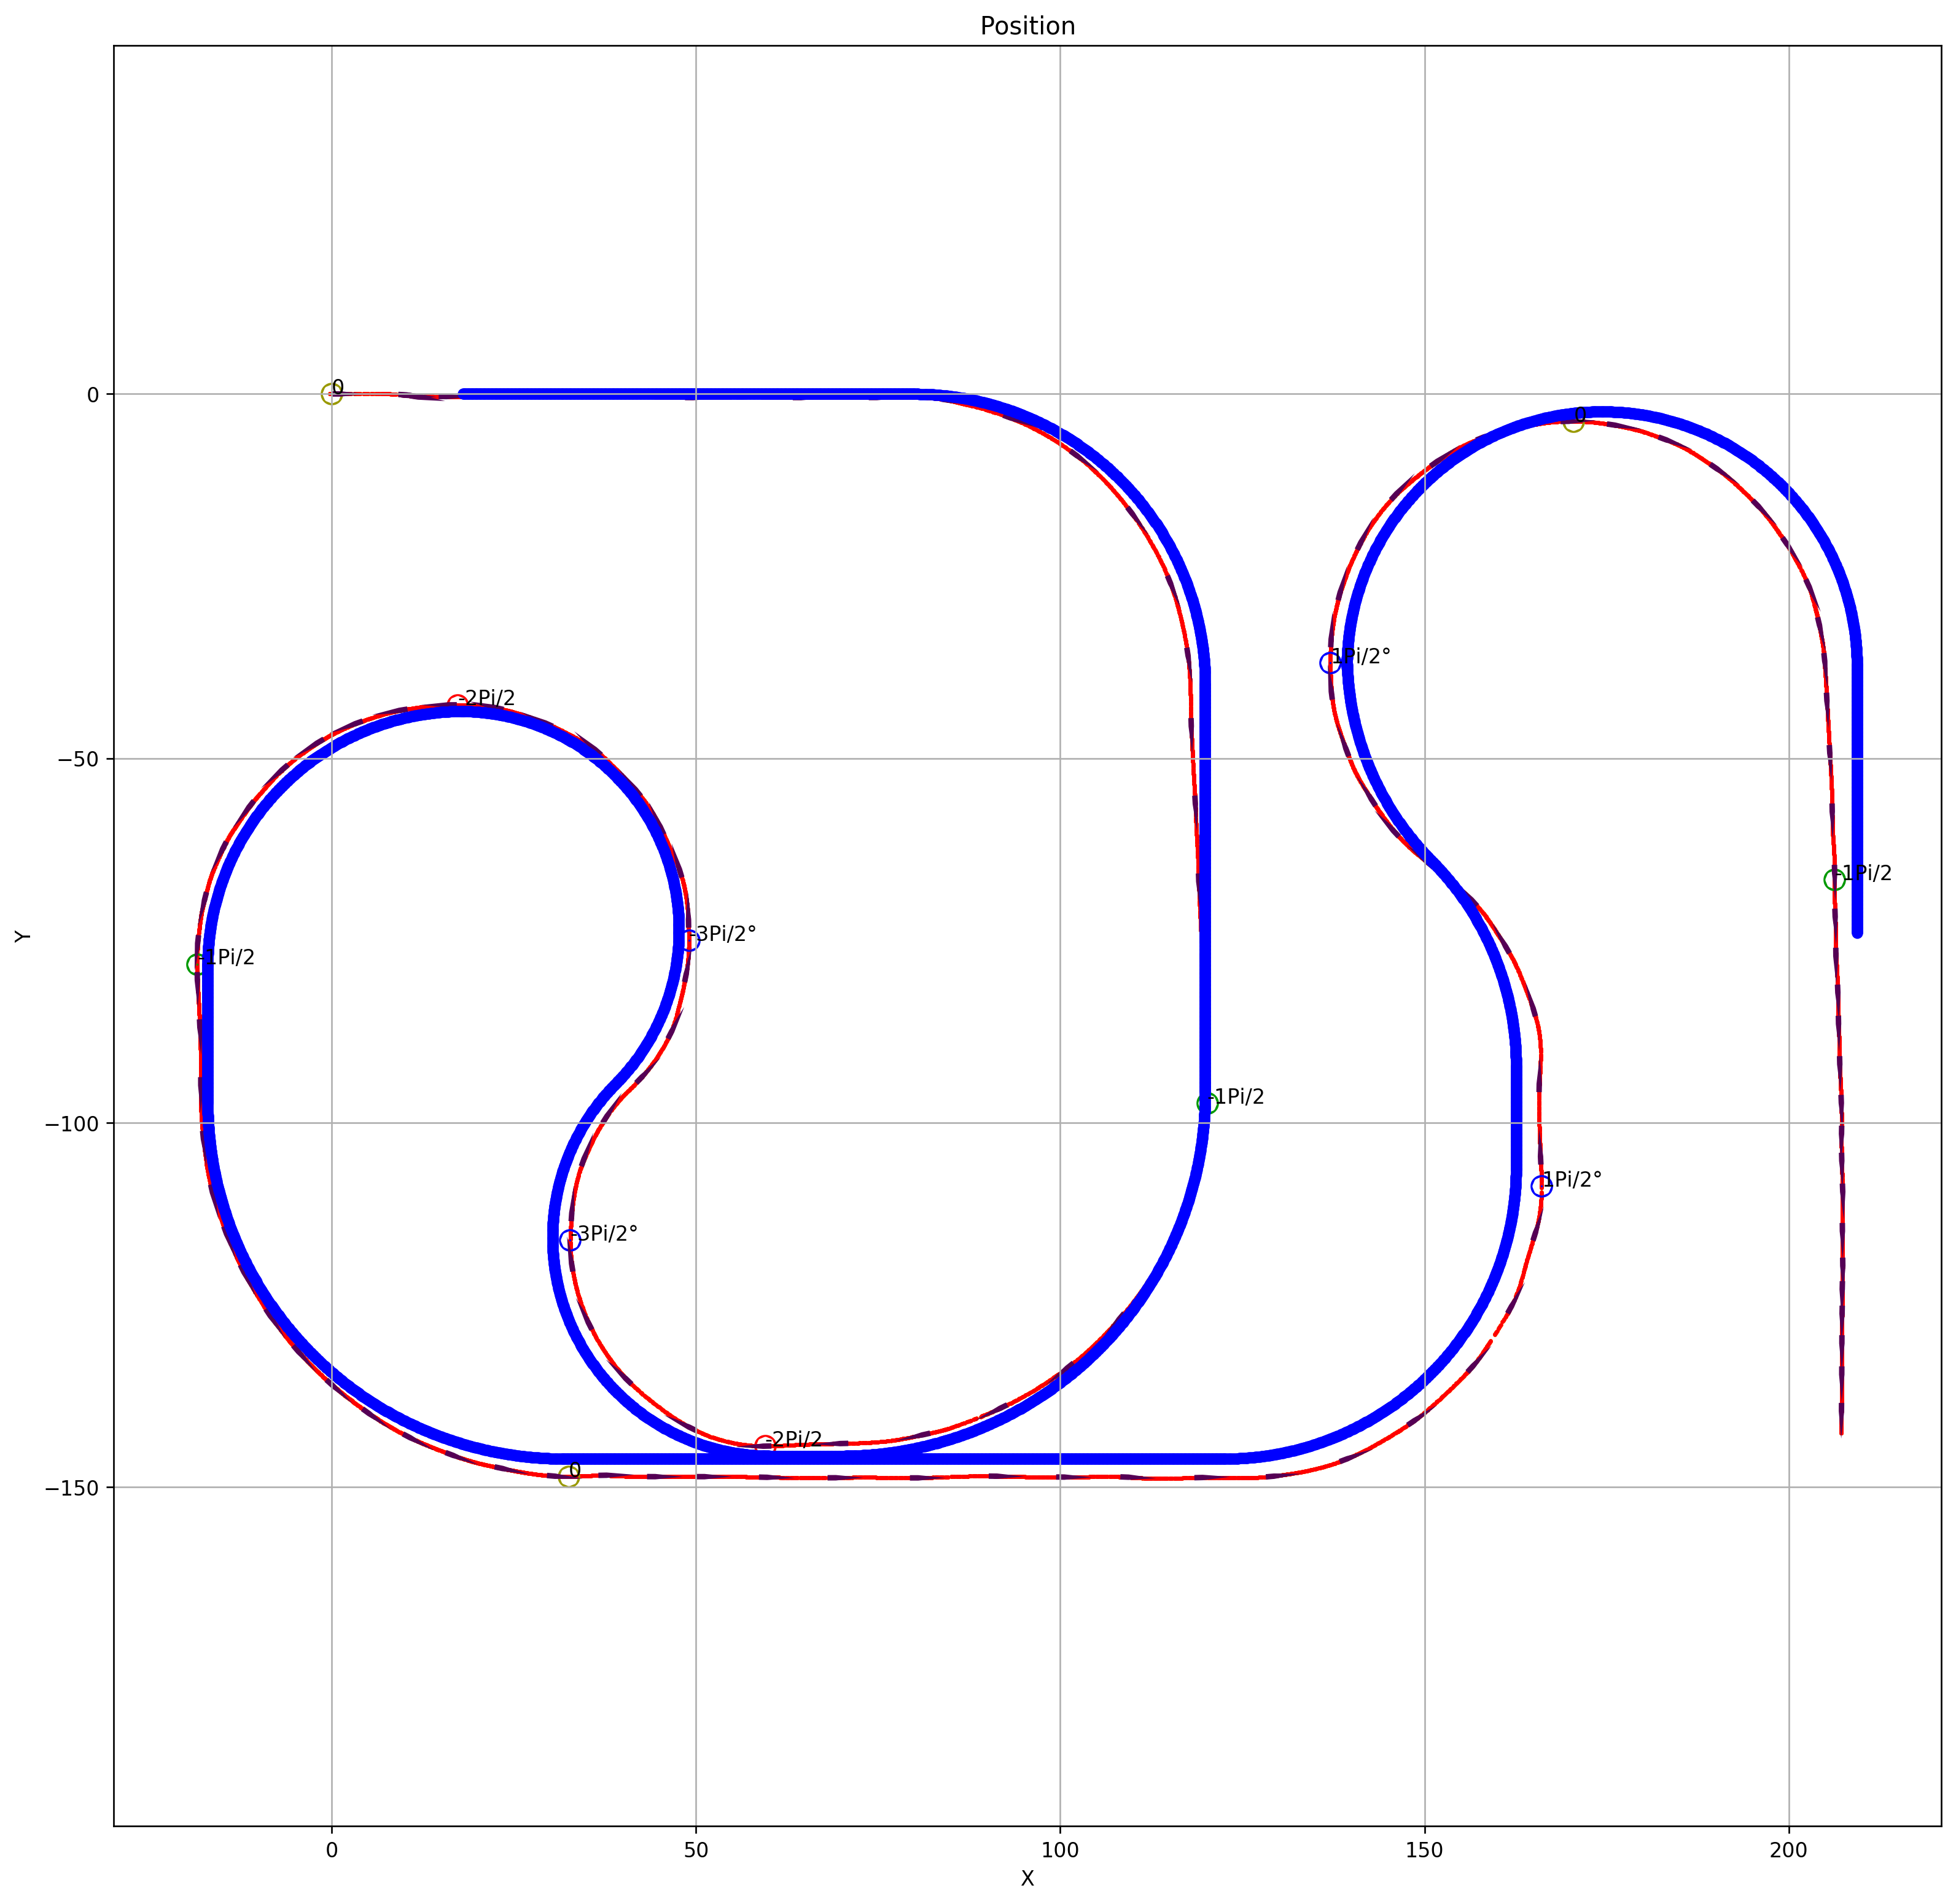

In [118]:
## SakiDocs jupyter
## tari@s1250039

## 注意点
#
# 一番最初の実行はグラフがうまく出ないかも
#
## 変数名について
#
# 変数名はCCC_NNNNNの形にしているものが多い。
# 
# CCCは接頭辞
# 
# fmt: 整形後データ
# raw: 生データ(取得したそのままの、単位を持つ値)
# plt: プロット
# tms: プロットを見やすくするためにﾁｮﾒ回おきに取得したもの
# max: 標準偏差
# max: 最大値
# min: 最小値
#
# NNNNNは個別の名前。
#
# その他の変数
#
# c: カウント用変数

#################### Import ####################

# import文で外部のライブラリをインポートする。
# > import ライブラリ名 as 渾名
# いちいちmatplotlib.pyplotと打つのは面倒なのでpltと略す。
# なむぽよ～～～

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


#################### Read CSV ####################

# CSVファイルから値を取り出してそれぞれの変数に格納する。

#------------------------------------------------------------
# ぽよめも
# 宣言について
# Pythonは動的型付けなので、変数の前に型を宣言する必要はない。
# オブジェクト志向?
# 変数の宣言
# > hensuu = value
# 配列の宣言
# > hayretz1 = []
# > hayretz2 = [yoso1, yoso2]
#------------------------------------------------------------

#0 : sensor
#1 : filtered
#2 : forward
#3 : turn
#4 : gyro
#5 : left motor angle
#6 : right motor angle
#7 : voltage
#8 : left motor pwm
#9 : right motor pwm

#----------------------------------------------------------------------
# ぽよめも
# forループについて
# > for line in file_lines
# file_linesを上からlineに格納する。
# file_linesの要素数だけル-プが回ったら終了。
# replaceについて
# 第1引数を第2引数で置換する。
# 文字列は改行込みで読み込まれるので、これを虚無で置換する。
# splitについて
# 読み込まれるデ-タはcsv形式なので、ｶﾝﾏｧが来たらそこでデータを分割する。
# float(line.replace("\n", "").split(",")[0]の[0]の基準は常に行の先頭。
# 何度読み込んでも変わらない。
#----------------------------------------------------------------------


##### Declare #####
raw_fltre = []
raw_flted = []
raw_fowrd = []
raw_turne = []
raw_gyroh = []
raw_mot_l = []
raw_mot_r = []
raw_voltg = []
raw_pwm_l = []
raw_pwm_r = []
raw_g_ofs = []
raw_theta = []
raw_pos_x = []
raw_pos_y = []
raw_speed = []

# Color List #
colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf' , '#ff00ff', '#00ff00']

##### File Open #####

file = open("190916試走会/forwardR_190916_1.txt")
# readlinesでfileを1行づつ読み込んで、file_linesに格納する。
# 以下はファイル読み込み用配列
file_lines = file.readlines()

##### VaLu Into Array #####

# appendで配列の最後に要素を追加する。
for line in file_lines:
    raw_fltre.append(float(line.replace("\n", "").split(",")[0]))
    raw_flted.append(float(line.replace("\n", "").split(",")[1]))
    raw_fowrd.append(float(line.replace("\n", "").split(",")[2]))
    raw_turne.append(float(line.replace("\n", "").split(",")[3]))
    raw_gyroh.append(float(line.replace("\n", "").split(",")[4]))
    raw_mot_l.append(float(line.replace("\n", "").split(",")[5]))
    raw_mot_r.append(float(line.replace("\n", "").split(",")[6]))
    raw_voltg.append(float(line.replace("\n", "").split(",")[7])) # mV
    raw_pwm_l.append(float(line.replace("\n", "").split(",")[8])) # -100~100 int
    raw_pwm_r.append(float(line.replace("\n", "").split(",")[9])) # -100~100 int
    raw_g_ofs.append(float(line.replace("\n", "").split(",")[10]))
    raw_theta.append(float(line.replace("\n", "").split(",")[11])) # Pi
    raw_pos_x.append(float(line.replace("\n", "").split(",")[12]))
    raw_pos_y.append(float(line.replace("\n", "").split(",")[13]))
    raw_speed.append(float(line.replace("\n", "").split(",")[14]))

#################### Mean ####################

men_fltre = np.mean(raw_fltre)
men_flted = np.mean(raw_flted)
men_fowrd = np.mean(raw_fowrd)
men_turne = np.mean(raw_turne)
men_gyroh = np.mean(raw_gyroh)
men_mot_l = np.mean(raw_mot_l)
men_mot_r = np.mean(raw_mot_r)
men_g_ofs = np.mean(raw_g_ofs)
men_theta = np.mean(raw_theta)
men_pos_x = np.mean(raw_pos_x)
men_pos_y = np.mean(raw_pos_y)
men_speed = np.mean(raw_speed)

#################### Maxim and Min ####################

# 最大値と最小値を求める。

##### Declare and Substitute#####
max_fltre = np.max(raw_fltre)
max_flted = np.max(raw_flted)
max_fowrd = np.max(raw_fowrd)
max_turne = np.max(raw_turne)
max_gyroh = np.max(raw_gyroh)
max_mot_l = np.max(raw_mot_l)
max_mot_r = np.max(raw_mot_r)
max_g_ofs = np.max(raw_g_ofs)
max_theta = np.max(raw_theta)
max_pos_x = np.max(raw_pos_x)
max_pos_y = np.max(raw_pos_y)
max_speed = np.max(raw_speed)
min_fltre = np.min(raw_fltre)
min_flted = np.min(raw_flted)
min_fowrd = np.min(raw_fowrd)
min_turne = np.min(raw_turne)
min_gyroh = np.min(raw_gyroh)
min_mot_l = np.min(raw_mot_l)
min_mot_r = np.min(raw_mot_r)
min_g_ofs = np.min(raw_g_ofs)
min_theta = np.min(raw_theta)
min_pos_x = np.min(raw_pos_x)
min_pos_y = np.min(raw_pos_y)
min_speed = np.min(raw_speed)

#################### Standard Deviation ####################

# 標準偏差を求める。

##### Declare and Substitute#####
std_fltre = np.std(raw_fltre)
std_flted = np.std(raw_flted)
std_fowrd = np.std(raw_fowrd)
std_turne = np.std(raw_turne)
std_gyroh = np.std(raw_gyroh)
std_mot_l = np.std(raw_mot_l)
std_mot_r = np.std(raw_mot_r)
std_g_ofs = np.std(raw_g_ofs)
std_theta = np.std(raw_theta)
std_pos_x = np.std(raw_pos_x)
std_pos_y = np.std(raw_pos_y)
std_speed = np.std(raw_speed)


#################### 1/n ####################

# 取得した値の配列をn個飛ばしにする。

##### Declare #####
tms_pos_x = []
tms_pos_y = []
tms_theta = []
tms_speed = []
n = 100 #ここを変える

##### Process #####
for c in range(0, len(raw_pos_x),n): #YYYは結局使わなかった
    tms_pos_x.append(raw_pos_x[c])
    tms_pos_y.append(raw_pos_y[c]) 
    tms_theta.append(raw_theta[c])
    tms_speed.append(raw_speed[c])



#################### plot ####################

# プロット

##### Declare #####
max_atayi = np.max(raw_speed)
min_atayi = np.min(raw_speed)
fmt_atayi = []
raw_atayi = tms_speed
raw_shcnt = [] #周回数、中身は整数値
fmt_theta = [] # ここに格納されるのは、範囲を0から2πにしたｽｨｰﾀｧ
π = np.pi
x1 = []
y1 = []
x2 = []
y2 = []
flag = 0
highflag = 0
##### Graph Settings #####
# グラフの設定(グラフの大きさとか)

plt_figre = plt.figure(figsize=(16,16), dpi=240) # figsize=(x, y)の単位はinch
plt_axes1= plt_figre.add_subplot(1,1,1)
x1 = tms_pos_x
y1 = tms_pos_y
x2 = np.cos(tms_theta)
y2 = np.sin(tms_theta)
# グリッド線の設定
plt.grid()
#ax.set_xlim(-150, 150)
#ax.set_ylim(-100, 100)
#ax.set_xticks(np.linspace(-150, 150, 31))
#ax.set_yticks(np.linspace(-100, 100, 21))
# アスペクト比の調整
plt.axes().set_aspect('equal', 'datalim')
# グラフのタイトル
plt_axes1.set_title('Position')
# X軸のタイトル
plt_axes1.set_xlabel('X')
# Y軸のタイトル
plt_axes1.set_ylabel('Y')

##### Preprocess #####
# 前処理

for c in range(len(tms_speed)):
    fmt_atayi.append(1-((raw_atayi[c] - max_speed) / (max_speed - min_speed)))

##### Process #####
# 処理

plt_axes1.scatter(raw_pos_x,raw_pos_y, c='#FFFF00', s=1, marker='o')
plt_axes1.scatter(raw_pos_x,raw_pos_y, c='red', s=1, marker='o')
for c in range(len(raw_theta)):
    raw_shcnt.append(int(raw_theta[c] / (2 * π))) # theta_shに周回数を記録する。(単位は回、周回数) 
    fmt_theta.append(raw_theta[c] - 2 * π * raw_shcnt[c])
for c in range(len(raw_speed)): # if文上段はｽｨｰﾀｧが正、下段はｽｨｰﾀｧが負のとき
    # 01233210-1-101
    if c == 0: # Start或いは一周したときは黄色
        plt_axes1.scatter(raw_pos_x[c], raw_pos_y[c], c='#999900', s=1, marker='o', lw=10)
        plt.text(raw_pos_x[c],raw_pos_y[c], r'0')
        flag = 1
    elif flag == 1 or flag == 6 or flag == 11:
        if fmt_theta[c] > 3*π/2 and fmt_theta[c-1] < 3*π/2 or fmt_theta[c] < 3*π/2 and fmt_theta[c-1] > 3*π/2: # 270度は緑
            plt_axes1.scatter(raw_pos_x[c],raw_pos_y[c], c='#009900', s=1, marker='o', lw=10)
            plt.text(raw_pos_x[c],raw_pos_y[c], r'3Pi/2')
            highflag = 1
        elif fmt_theta[c] > -1*π/2 and fmt_theta[c-1] < -1*π/2 or fmt_theta[c] < -1*π/2 and fmt_theta[c-1] > -1*π/2: # -270度は緑
            plt_axes1.scatter(raw_pos_x[c],raw_pos_y[c], c='#009900', s=1, marker='o', lw=10)
            plt.text(raw_pos_x[c],raw_pos_y[c], r'-1Pi/2')
            highflag = 1
        if highflag == 1:
            flag += 1
    elif flag == 2 or flag == 5:
        if fmt_theta[c] > -1*π and fmt_theta[c-1] < -1*π or fmt_theta[c] < -1*π and fmt_theta[c-1] > -1*π: # -180度は赤
            plt_axes1.scatter(raw_pos_x[c],raw_pos_y[c], c='#FF0000', s=1, marker='o', lw=10)
            plt.text(raw_pos_x[c],raw_pos_y[c], r'-2Pi/2')
            highflag = 1
        elif fmt_theta[c] > π and fmt_theta[c-1] < π or fmt_theta[c]<π and fmt_theta[c-1] > π: # 180度は緑
            plt_axes1.scatter(raw_pos_x[c],raw_pos_y[c], c='#FF0000', s=1, marker='o', lw=10)
            plt.text(raw_pos_x[c],raw_pos_y[c], r'2Pi/2')
            highflag = 1
        if highflag == 1:
            flag += 1
    elif flag == 3 or flag == 4 or flag == 8 or flag == 9 and raw_pos_y[c] > -50:   
        if fmt_theta[c] > π/2 and fmt_theta[c-1] < π/2 or fmt_theta[c] < π/2 and fmt_theta[c-1] > π/2: # 90度は青
            plt_axes1.scatter(raw_pos_x[c],raw_pos_y[c], c='#0000FF', s=1, marker='o', lw=10)
            plt.text(raw_pos_x[c],raw_pos_y[c], r'1Pi/2°')
            highflag = 1
        elif fmt_theta[c] > -3*π/2 and fmt_theta[c-1] < -3*π/2 or fmt_theta[c] < -3*π/2 and fmt_theta[c-1] > -3*π/2: # -90度は青
            plt_axes1.scatter(raw_pos_x[c],raw_pos_y[c], c='#0000FF', s=1, marker='o', lw=10)
            plt.text(raw_pos_x[c],raw_pos_y[c], r'-3Pi/2°')
            highflag = 1
        if highflag == 1:
            flag += 1
    elif flag == 7 or flag == 10:
        
        if fmt_theta[c] < 0 < fmt_theta[c-1] or fmt_theta[c] > 0 > fmt_theta[c-1]:
            plt_axes1.scatter(raw_pos_x[c], raw_pos_y[c], c='#999900', s=1, marker='o', lw=10)
            plt.text(raw_pos_x[c],raw_pos_y[c], r'0')
            highflag = 1
        if highflag == 1:
            flag += 1
    highflag = 0
for c in range(len(x1)):
    plt_axes1.quiver(x1[c],y1[c],x2[c],y2[c],color='#550055',scale=fmt_atayi[0]*30,headwidth=1,width=0.003)#scaleは10くらいが気持ちいい
plt_axes1.scatter(ref_pos_x,ref_pos_y, c='blue', s=20, marker='o')
plt.savefig('HKato.png')

In [ ]:
# Straight: 1 mm  Curve: Payi / 200
# 

ZeroDivisionError: division by zero

In [115]:

π = np.pi

ref_pos_x = []
ref_pos_y = []
ref_theta = []
tmp_gpv_x = 0
tmp_gpv_y = 0
tmp_gpv_c = 0
c = 0
for c in range(620):
    ref_pos_x.append(c)
    ref_pos_y.append(0)
    ref_theta.append(0)
tmp_gpv_c += c
tmp_gpv_x = ref_pos_x[tmp_gpv_c]
tmp_gpv_y = ref_pos_y[tmp_gpv_c]
for c in range(400):
    ref_theta.append(-c*np.pi/800+np.pi/2)
    ref_pos_x.append(np.cos(ref_theta[tmp_gpv_c + c+1])*400+tmp_gpv_x)
    ref_pos_y.append(np.sin(ref_theta[tmp_gpv_c + c+1])*400-400)
tmp_gpv_c += c+1
tmp_gpv_x = ref_pos_x[tmp_gpv_c]
tmp_gpv_y = ref_pos_y[tmp_gpv_c]
for c in range(560):
    ref_pos_x.append(tmp_gpv_x)
    ref_pos_y.append(tmp_gpv_y-c)
    ref_theta.append(np.pi/2)
tmp_gpv_c += c+1
tmp_gpv_x = ref_pos_x[tmp_gpv_c]
tmp_gpv_y = ref_pos_y[tmp_gpv_c]
for c in range(500):
    ref_theta.append(-c*np.pi/1000+2*np.pi)
    ref_pos_x.append(np.cos(ref_theta[tmp_gpv_c+c])*500+tmp_gpv_x-500)
    ref_pos_y.append(np.sin(ref_theta[tmp_gpv_c+c])*500+tmp_gpv_y)
tmp_gpv_c += c+1
tmp_gpv_x = ref_pos_x[tmp_gpv_c]
tmp_gpv_y = ref_pos_y[tmp_gpv_c]
for c in range(100):
    ref_pos_x.append(tmp_gpv_x-c)
    ref_pos_y.append(tmp_gpv_y)
    ref_theta.append(np.pi / 2)
tmp_gpv_c += c+1
tmp_gpv_x = ref_pos_x[tmp_gpv_c]
tmp_gpv_y = ref_pos_y[tmp_gpv_c]
for c in range(450):
    ref_theta.append(-c*np.pi/600+3*np.pi/2)
    ref_pos_x.append(np.cos(ref_theta[tmp_gpv_c+c])*300+tmp_gpv_x)
    ref_pos_y.append(np.sin(ref_theta[tmp_gpv_c+c])*300+tmp_gpv_y+300)
tmp_gpv_c += c+1
tmp_gpv_x = ref_pos_x[tmp_gpv_c]
tmp_gpv_y = ref_pos_y[tmp_gpv_c]
for c in range(450):
    ref_theta.append(c*np.pi/600+7*np.pi/4)
    ref_pos_x.append(np.cos(ref_theta[tmp_gpv_c+c])*300+tmp_gpv_x-300*np.cos(np.pi/4))
    ref_pos_y.append(np.sin(ref_theta[tmp_gpv_c+c])*300+tmp_gpv_y+300*np.sin(np.pi/4))
tmp_gpv_c += c+1
tmp_gpv_x = ref_pos_x[tmp_gpv_c]
tmp_gpv_y = ref_pos_y[tmp_gpv_c]
print(tmp_gpv_x)
for c in range(350):
    ref_theta.append(c*np.pi/700+np.pi/2)
    ref_pos_x.append(np.cos(ref_theta[tmp_gpv_c+c])*350+tmp_gpv_x)
    ref_pos_y.append(np.sin(ref_theta[tmp_gpv_c+c])*350+tmp_gpv_y-350)
tmp_gpv_c += c+1
tmp_gpv_x = ref_pos_x[tmp_gpv_c]
tmp_gpv_y = ref_pos_y[tmp_gpv_c]
for c in range(190):
    ref_pos_x.append(tmp_gpv_x)
    ref_pos_y.append(tmp_gpv_y-c)
    ref_theta.append(np.pi / 2)
tmp_gpv_c += c+1
tmp_gpv_x = ref_pos_x[tmp_gpv_c]
tmp_gpv_y = ref_pos_y[tmp_gpv_c]
for c in range(490):
    ref_theta.append(c*np.pi/980+np.pi)
    ref_pos_x.append(np.cos(ref_theta[tmp_gpv_c+c])*490+tmp_gpv_x+490)
    ref_pos_y.append(np.sin(ref_theta[tmp_gpv_c+c])*490+tmp_gpv_y)
tmp_gpv_c += c+1
tmp_gpv_x = ref_pos_x[tmp_gpv_c]
tmp_gpv_y = ref_pos_y[tmp_gpv_c]
for c in range(910):
    ref_pos_x.append(tmp_gpv_x+c)
    ref_pos_y.append(tmp_gpv_y)
    ref_theta.append(0)
tmp_gpv_c += c+1
tmp_gpv_x = ref_pos_x[tmp_gpv_c]
tmp_gpv_y = ref_pos_y[tmp_gpv_c]
for c in range(400):
    ref_theta.append(c*np.pi/800+3*np.pi/2)
    ref_pos_x.append(np.cos(ref_theta[tmp_gpv_c+c])*400+tmp_gpv_x)
    ref_pos_y.append(np.sin(ref_theta[tmp_gpv_c+c])*400+tmp_gpv_y+400)
tmp_gpv_c += c+1
tmp_gpv_x = ref_pos_x[tmp_gpv_c]
tmp_gpv_y = ref_pos_y[tmp_gpv_c]
for c in range(143):
    ref_pos_x.append(tmp_gpv_x)
    ref_pos_y.append(tmp_gpv_y+c)
    ref_theta.append(-1 * np.pi / 2)
tmp_gpv_c += c+1
tmp_gpv_x = ref_pos_x[tmp_gpv_c]
tmp_gpv_y = ref_pos_y[tmp_gpv_c]
# for c in range(175):
#     ref_theta.append(c*np.pi/700+2*np.pi)
#     ref_pos_x.append(np.cos(ref_theta[tmp_gpv_c+c])*350+tmp_gpv_x-350)
#     ref_pos_y.append(np.sin(ref_theta[tmp_gpv_c+c])*350+tmp_gpv_y)
for c in range(200):
    ref_theta.append(c*np.pi/800+2*np.pi)
    ref_pos_x.append(np.cos(ref_theta[tmp_gpv_c+c])*400+tmp_gpv_x-400)
    ref_pos_y.append(np.sin(ref_theta[tmp_gpv_c+c])*400+tmp_gpv_y)
tmp_gpv_c += c+1
tmp_gpv_x = ref_pos_x[tmp_gpv_c]
tmp_gpv_y = ref_pos_y[tmp_gpv_c]
for c in range(200):
    ref_theta.append(-1*c*np.pi/800+5*np.pi/4)
    ref_pos_x.append(np.cos(ref_theta[tmp_gpv_c+c])*400+tmp_gpv_x+400*np.cos(np.pi/4))
    ref_pos_y.append(np.sin(ref_theta[tmp_gpv_c+c])*400+tmp_gpv_y+400*np.sin(np.pi/4))
tmp_gpv_c += c+1
tmp_gpv_x = ref_pos_x[tmp_gpv_c]
tmp_gpv_y = ref_pos_y[tmp_gpv_c]
for c in range(700):
    ref_theta.append(-c*np.pi/700+4*np.pi/4)
    ref_pos_x.append(np.cos(ref_theta[tmp_gpv_c+c])*350+tmp_gpv_x+350)
    ref_pos_y.append(np.sin(ref_theta[tmp_gpv_c+c])*350+tmp_gpv_y+350+tmp_gpv_y)
tmp_gpv_c += c+1
tmp_gpv_x = ref_pos_x[tmp_gpv_c]
tmp_gpv_y = ref_pos_y[tmp_gpv_c]
for c in range(370):
    ref_pos_x.append(tmp_gpv_x)
    ref_pos_y.append(tmp_gpv_y-c)
    ref_theta.append(np.pi / 2)
tmp_gpv_c += c+1
tmp_gpv_x = ref_pos_x[tmp_gpv_c]
tmp_gpv_y = ref_pos_y[tmp_gpv_c]

c=0
n=0
for c in range(tmp_gpv_c):
    if c == 0:
        pass
    elif ref_pos_x[c-n] - ref_pos_x[c-n-1] > 100 or ref_pos_x[c-n] - ref_pos_x[c-n-1] < -100 or\
    ref_pos_y[c-n] - ref_pos_y[c-n-1] > 100 or ref_pos_y[c-n] - ref_pos_y[c-n-1] < -100:
        ref_pos_x.pop(c-n)
        ref_pos_y.pop(c-n)
        ref_theta.pop(c-n)
        n += 1
c=0
for c in range(len(ref_pos_x)):
    ref_pos_x[c] = ref_pos_x[c] / 10 + 18
    ref_pos_y[c] = ref_pos_y[c] / 10

-0.1938152755642477
